# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1375 Андрусенко Константин. Вариант №3

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения


##### Регрессионная модель: 
$\mathbb{E}_{\theta}(Y|z)=f_{\theta}(z)$

##### Линейная регрессионная модель: 
$\mathbb{E}_{\theta}(Y|z)=x(z)^\intercal\beta$

##### Статистическая модель: 
$\mathbb{E}_{\theta}(Y|z)=X^\intercal\beta$, $var(Y|z) = \sigma^2E$

##### МНК
$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min_\beta$

##### Несмещённая оценка дисперсии:
$S^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\hat{\beta})}{n-r}$

##### Доверительный интервал
ДНО - функция:
$\psi(\beta) = C^\intercal\beta$
МНК оценка: 
$\hat{\psi}= C^\intercal\hat{\beta}$
$b_\psi = C^\intercal(XX^\intercal)^{-1}C$
Распределение: $\hat{\psi} \sim \mathcal{N}(\psi,\sigma^2b_\psi) $
Тогда $\frac{\hat{\psi} - {\psi}}{S\sqrt{b_\psi}} \sim S_{n-r}$
Доверительный интервал: 
$\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$, где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


### 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$.  Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

In [985]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import scipy.stats as sst


In [986]:
X = [int(x) for x in "4 5 3 4 5 5 7 5 3 2 5 4 1 6 3 4 4 3 3 3 6 7 5 7 5 2 6 4 3 3 7 3 3 6 5 5 5 4 3 6 3 6 3 3 4 3 6 3 3 5".split(" ")]

Y = [float(y) for y in "23.79 13.60 9.50 7.70 14.69 19.63 33.74 20.91 12.89 7.20 26.80 12.38 27.13 17.47 25.47 19.19 5.21 18.78 4.90 13.70 0.04 13.52 21.71 16.44 11.51 16.57 1.97 21.66 16.09 18.99 6.53 16.78 11.79 23.12 6.08 2.04 25.48 7.57 21.44 15.46 19.66 18.91 41.12 11.42 20.32 21.93 20.60 5.76 13.39 23.69".split(" ")]

alpha = 0.20
h = 3.10

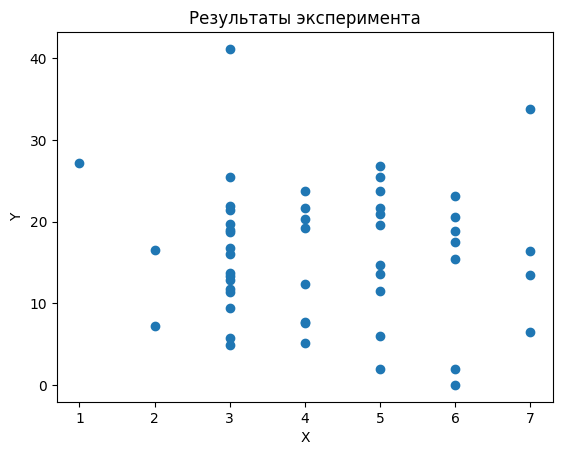

In [987]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Результаты эксперимента')
plt.show()

Линейная модель регрессии переменной Y по переменной X: 
$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$  <br>
$Y = \beta_0+\beta_1X$



In [988]:
X_m = np.matrix([[1] * len(X), X])
Y_m = np.matrix(Y).T
XX_T = X_m*X_m.T
XX_T_inv = np.linalg.inv(XX_T)
B = XX_T_inv*X_m*Y_m

b0 = float(np.asarray(B)[0][0])
b1 = float(np.asarray(B)[1][0])

print("b0 = " + str(b0))
print("b1 = " + str(b1))


b0 = 17.343472827116077
b1 = -0.2859325885248978


$ Y \approx 17.34 - 0.29X$ 

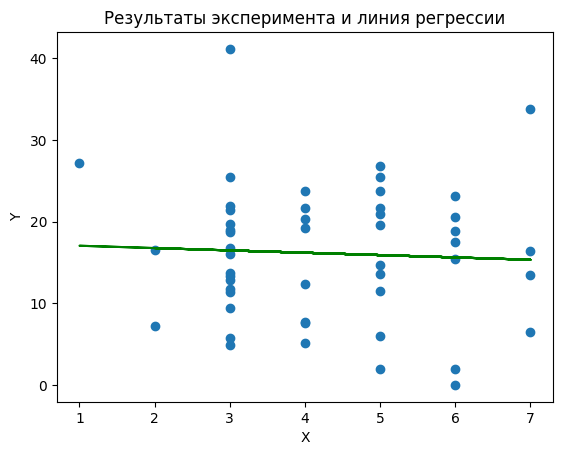

In [989]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.plot(X, b0 + b1 * np.array(X), color = 'g')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Результаты эксперимента и линия регрессии')
plt.show()

По графику заметим, что регрессионная модель приближает не очень хорошо, видны явные выбросы

### 2) Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.


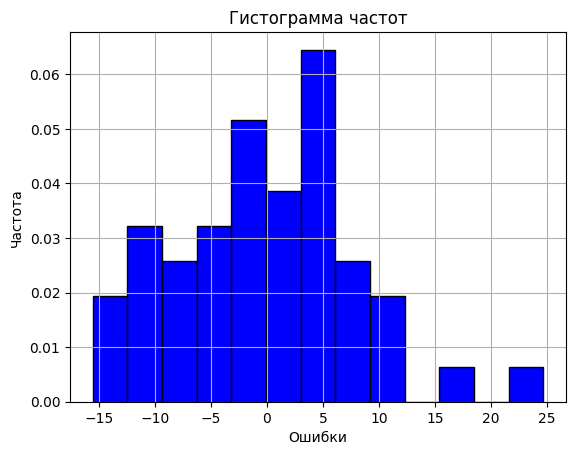

Несмешенная оценка дисперсии:  69.41080043000062


In [990]:
e = Y_m - X_m.T*B
bins=np.arange(np.min(e), (np.max(e) + h),h)
n = len(X)
r = np.linalg.matrix_rank(X_m)
unb_var = np.linalg.norm(Y_m - X_m.T * B)**2/(n - r)

plt.grid()
plt.hist(e, bins = bins, color='b', edgecolor="black",density=True)
plt.title("Гистограмма частот")
plt.xlabel("Ошибки")
plt.ylabel("Частота")
plt.show()

print("Несмешенная оценка дисперсии: ", unb_var)

Проверим гипотезу нормальности ошибок через $\chi^2$
$ H_0: ε ∼ N(0,\sigma^2E) $
$ H_A: ε \nsim  N(0,\sigma^2E) $


In [991]:
intervals = np.histogram(e, bins=11)

values = intervals[1]
ni2 = intervals[0]

intervals = [[0, 1], [2, 3], [4], [5], [6, 10]]
values_intervals = []
i = 0

for int_i in intervals:
    values_intervals.append([values[int_i[0]], values[int_i[len(int_i)-1]+1]])
    i += 1

N_i = [0]*len(intervals)
i = 0

for int_i in intervals:
    for j in range(int_i[0], int_i[len(int_i)-1]+1):
        N_i[i] += ni2[j]
    i += 1

print(f"I1: (-∞, {values_intervals[0][1]}]")
for j in range(1, len(values_intervals)-1):
    print(f"I{j+1}: ({values_intervals[j][0]}, {values_intervals[j][1]}]")
print(f"I5: ({values_intervals[4][0]}, +∞]")

print("Длины: ", " ".join([f"I{i+1}: {N_i[i]}, " for i in range(0, len(N_i))]))

X2 = 0

i = 0

mn = 0
std_e = np.sqrt(unb_var)

for int_i in values_intervals:
    if (len(int_i) > 1):
        P = stats.norm.cdf(int_i[-1], loc=0, scale=std_e) - stats.norm.cdf(int_i[0], loc=0, scale=std_e)
    else:
        P = stats.norm.cdf(int_i[-1], loc=0, scale=std_e)
    X2 += (N_i[i] - len(e)*P)**2/len(e)/P
    i += 1


print("Наблюдаемый критерий X2 = ", round(X2, 4))
chi_value = stats.chi2.ppf(1-alpha, len(intervals)-1)
print('Значение X^2 при уровне значимости ', alpha, 'и', len(intervals)-1, 'степенях свободы = ' , round(chi_value,4))

I1: (-∞, -8.274749616980273]
I2: (-8.274749616980273, -0.9616219379938524]
I3: (-0.9616219379938524, 2.6949419014993587]
I4: (2.6949419014993587, 6.351505740992568]
I5: (6.351505740992568, +∞]
Длины:  I1: 11,  I2: 11,  I3: 8,  I4: 11,  I5: 9, 
Наблюдаемый критерий X2 =  6.1286
Значение X^2 при уровне значимости  0.2 и 4 степенях свободы =  5.9886


$\chi^2 > \chi_{2;0.2}^2$ следовательно гипотезу $H_0$ отвергаем

Проверим гипотезу нормальности ошибок через критерий Колмагорова

In [992]:
e_arr = np.asarray(e.T)[0]
print("Статистика критерия Колмогорова Dn:", round(stats.kstest([el for el in e_arr], "norm", args = (0, std_e)).statistic, 5))

print("x_alpha:", stats.kstwobign.ppf(1 - alpha) / np.sqrt(len(e)))

Статистика критерия Колмогорова Dn: 0.06619
x_alpha: 0.1517096432224198


$D_n < x_{\alpha_2}$ следовательно нет оснований отвергнуть гипотезу 

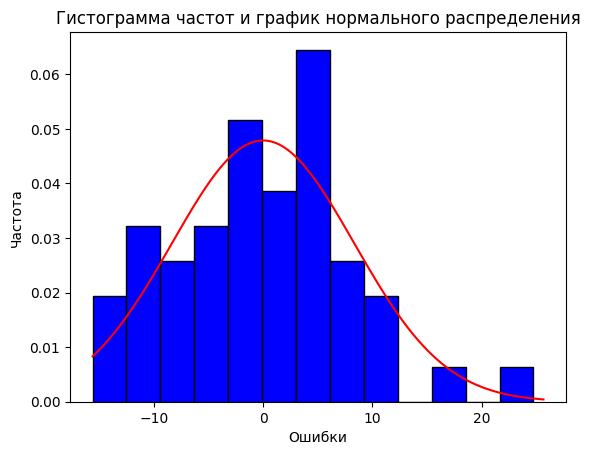

In [993]:
plt.hist(e, bins = bins, color='b', edgecolor='black',density=True)
arange = np.arange(np.min(e), np.max(e)+ 1, 0.01)
plt.plot(arange, stats.norm.pdf(arange, 0, std_e), color='r')
plt.title('Гистограмма частот и график нормального распределения')
plt.xlabel("Ошибки")
plt.ylabel("Частота")
plt.show()

По графику видно, что распределение похоже на нормальное, несмотря на некоторые выбросы.

### 3) В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).

In [994]:
x_alpha = stats.t.ppf(1 - alpha/2, n-r)
print('x_alpha =', x_alpha)

CT_0 = np.matrix([[1], [0]])
b_0 = CT_0.T * XX_T_inv * CT_0
psi_0 = CT_0.T * B

left_0 = (psi_0 - x_alpha * np.sqrt(unb_var * b_0))[0, 0]
right_0 = (psi_0 + x_alpha * np.sqrt(unb_var * b_0))[0, 0]

CT_1 = np.matrix([[0], [1]])
b_1 = CT_1.T * XX_T_inv * CT_1
psi_1 = CT_1.T * B
left_1 = (psi_1 - x_alpha * np.sqrt(unb_var * b_1))[0, 0]
right_1 = (psi_1 + x_alpha * np.sqrt(unb_var * b_1))[0, 0]

print(f'Доверительный интервал для beta_0: [{left_0}, {right_0}]')
print(f'Доверительный интервал для beta_1: [{left_1}, {right_1}]')

x_alpha = 1.2994388784066297
Доверительный интервал для beta_0: [12.601969914315308, 22.084975739916846]
Доверительный интервал для beta_1: [-1.3393398340294322, 0.7674746569796367]


In [995]:
e_val, e_vec = np.linalg.eig(np.array(XX_T))
print("Собственные векторы: ")
print(e_vec)
print("Собственные числа: ")
print(e_val)

Собственные векторы: 
[[-0.97839539 -0.20674251]
 [ 0.20674251 -0.97839539]]
Собственные числа: 
[   4.99145306 1058.00854694]


$ P\left(\widehat{\psi} - \psi\right) = \begin{pmatrix} -0.98 & -0.21 \\ 0.21 & -0.98\end{pmatrix} \begin{pmatrix} 5.32 - \beta_0 \\ 0.88 - \beta_1 \end{pmatrix} = \begin{pmatrix} -5.3984 + 0.98\beta_0 + 0.21\beta_1 \\ 0.2548 - 0.21\beta_0 + 0.98\beta_1\end{pmatrix} $

In [996]:
axis = np.sqrt(1 / (e_val / (x_alpha * 2 * unb_var)))
a = axis[0]
b = axis[1]
print("Первая полуось: ", a)
print("Вторая полуось: ", b)

Первая полуось:  6.011639877975586
Вторая полуось:  0.4129161452117851


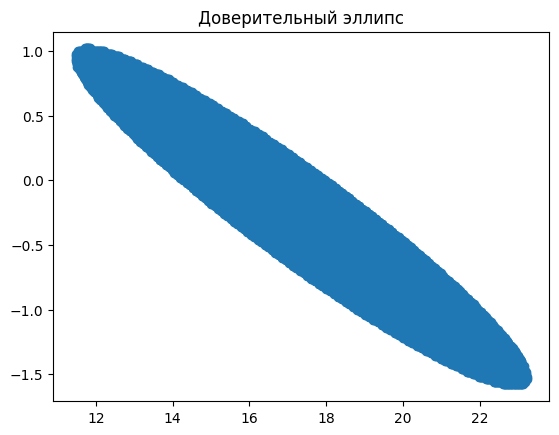

In [997]:
C = np.eye(2)
psi = C.T*B
b = C.T*XX_T_inv*C

b0_arr = []
b1_arr = []

for xi in np.arange(10, 25, 0.02):
    for yi in np.arange(-4, 4, 0.02):
        x_vec = np.asmatrix([[xi], [yi]])
        if (x_vec - psi).T * np.linalg.inv(b) * (x_vec - psi) <= 2*unb_var*x_alpha:
            b0_arr.append(xi)
            b1_arr.append(yi)
plt.title('Доверительный эллипс')
plt.scatter(b0_arr, b1_arr)
plt.show()

### 4) Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости.

Гипотеза: $H_0 : \psi = 0$

In [998]:
mn_Y = np.mean(Y)
b0_h = mn_Y
b1_h = 0
B_h_m = np.matrix([[b0_h], [b1_h]])
SSh = np.linalg.norm(Y_m - X_m.T * B_h_m) ** 2 - np.linalg.norm(Y_m - X_m.T * B)**2
SSe = unb_var*(n - r)
F = (SSh / 2) / (SSe / (n-r))
print(f"F = {F}")
print(f"x_alpha = {stats.f.ppf(1 - alpha, dfn = 2, dfd = n - r)}")

F = 0.06220372986966718
x_alpha = 1.6646290755148485


$F < x_{\alpha_2}$,  следовательно нет оснований отвергать гипотезу

### 5)  Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0, \beta_1, \beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Линейная регрессионная модель с дополнительным членом $X^2$:

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta $ <br>
$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \varepsilon$

In [999]:
X_m = np.matrix([[1] * len(X), X, [x**2 for x in X]])
Y_m = np.matrix(Y).T
XX_T = X_m*X_m.T
XX_T_inv = np.linalg.inv(X_m*X_m.T)
B = XX_T_inv*X_m*Y_m

b0 = float(np.asarray(B)[0][0])
b1 = float(np.asarray(B)[1][0])
b2 = float(np.asarray(B)[2][0])

print("b0 = " + str(b0))
print("b1 = " + str(b1))
print("b2 = " + str(b2))

b0 = 23.698365378100906
b1 = -3.523145793806939
b2 = 0.36701064676786455


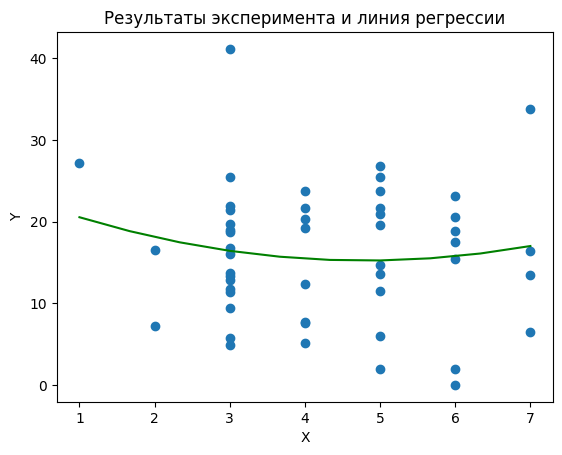

In [1000]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
X_for_plot = np.linspace(min(X), max(X), 10)
ax.plot(X_for_plot, [b0 + b1 * x + b2 * x**2 for x in X_for_plot], color = 'g')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Результаты эксперимента и линия регрессии')
plt.show()

Заметим, что парабола уже лучше приближает распределение, чем прямая

### 6) Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

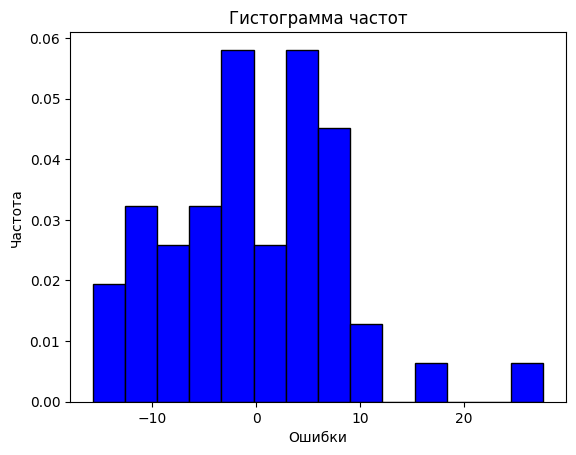

Несмешенная оценка дисперсии:  70.11877522564393


In [1001]:
e = Y_m - X_m.T*B
bins=np.arange(np.min(e), np.max(e)+h,h)
n = len(X)
r = np.linalg.matrix_rank(X_m)
unb_var = np.linalg.norm(Y_m - X_m.T * B)**2/(n - r)

plt.hist(e, bins = bins, color='b', edgecolor="black",density=True)
plt.title("Гистограмма частот")
plt.xlabel("Ошибки")
plt.ylabel("Частота")
plt.show()

print("Несмешенная оценка дисперсии: ", unb_var)

Проверим гипотезу нормальности ошибок через $\chi^2$
$ H_0: ε ∼ N(0,\sigma^2E) $
$ H_A: ε \nsim  N(0,\sigma^2E) $

In [1002]:
intervals = np.histogram(e, bins=11)

values = intervals[1]
ni2 = intervals[0]
print(ni2)
intervals = [[0, 1], [2, 3], [4], [5], [6, 10]]
values_intervals = []
i = 0

for int_i in intervals:
    values_intervals.append([values[int_i[0]], values[int_i[len(int_i)-1]+1]])
    i += 1

N_i = [0]*len(intervals)
i = 0

for int_i in intervals:
    for j in range(int_i[0], int_i[len(int_i)-1]+1):
        N_i[i] += ni2[j]
    i += 1

print(f"I1: (-∞, {values_intervals[0][1]}]")
for j in range(1, len(values_intervals)-1):
    print(f"I{j+1}: ({values_intervals[j][0]}, {values_intervals[j][1]}]")
print(f"I5: ({values_intervals[4][0]}, +∞]")

print("Длины: ", " ".join([f"I{i+1}: {N_i[i]}, " for i in range(0, len(N_i))]))

X2 = 0

i = 0

mn = 0
std_e = np.sqrt(unb_var)

for int_i in values_intervals:
    if (len(int_i) > 1):
        P = stats.norm.cdf(int_i[-1], loc=0, scale=std_e) - stats.norm.cdf(int_i[0], loc=0, scale=std_e)
    else:
        P = stats.norm.cdf(int_i[-1], loc=0, scale=std_e)
    X2 += (N_i[i] - len(e)*P)**2/len(e)/P
    i += 1


print("Наблюдаемый критерий X2 = ", round(X2, 4))
chi_value = stats.chi2.ppf(1-alpha, len(intervals)-1)
print('Значение X^2 при уровне значимости ', alpha, 'и', len(intervals)-1, 'степенях свободы = ' , round(chi_value,4))

[ 3  6  4  9  8 10  6  2  1  0  1]
I1: (-∞, -8.38281024775485]
I2: (-8.38281024775485, -1.0337465966073012]
I3: (-1.0337465966073012, 2.6407852289664717]
I4: (2.6407852289664717, 6.315317054540248]
I5: (6.315317054540248, +∞]
Длины:  I1: 9,  I2: 13,  I3: 8,  I4: 10,  I5: 10, 
Наблюдаемый критерий X2 =  2.1985
Значение X^2 при уровне значимости  0.2 и 4 степенях свободы =  5.9886


$\chi^2 < \chi_{2;0.2}^2$, следовательно причин отвергнуть гипотезу $H_0$ нет


In [1003]:
e_arr = np.asarray(e.T)[0]
print("Статистика критерия Колмогорова Dn:", round(stats.kstest([el for el in e_arr], "norm", args = (0, std_e)).statistic, 5))

print("x_alpha:", stats.kstwobign.ppf(1 - alpha) / np.sqrt(len(e)))

Статистика критерия Колмогорова Dn: 0.06022
x_alpha: 0.1517096432224198


$D_n < x_{\alpha_2}$ следовательно нет оснований отвергнуть гипотезу 

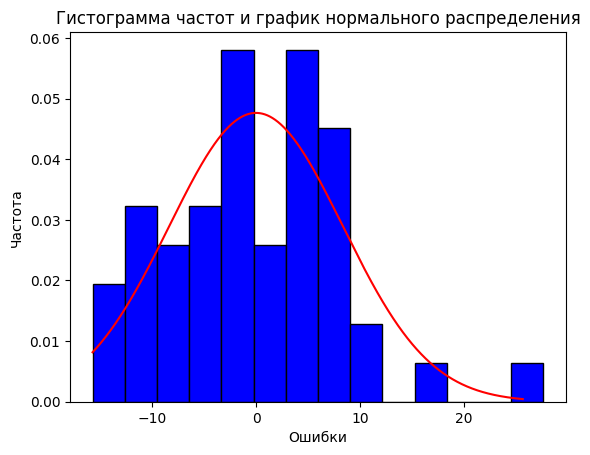

In [1004]:
plt.hist(e, bins = bins, color='b', edgecolor='black',density=True)
arange = np.arange(min(e_arr), max(e_arr) + 1, 0.01)
plt.plot(arange, stats.norm.pdf(arange, 0, std_e), color='r')
plt.title('Гистограмма частот и график нормального распределения')
plt.xlabel("Ошибки")
plt.ylabel("Частота")
plt.show()

По графику видно, что распределение похоже на нормальное, несмотря на некоторые выбросы.

### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0, \beta_1, \beta_2$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1 - \alpha$

In [1005]:
x_alpha = stats.t.ppf(1 - alpha/2, n-r)
print('x_alpha =', x_alpha)

CT_0 = np.matrix([[1], [0], [0]])
b_0 = CT_0.T * XX_T_inv * CT_0
psi_0 = CT_0.T * B

left_0 = (psi_0 - x_alpha * np.sqrt(unb_var * b_0))[0, 0]
right_0 = (psi_0 + x_alpha * np.sqrt(unb_var * b_0))[0, 0]

CT_1 = np.matrix([[0], [1], [0]])
b_1 = CT_1.T * XX_T_inv * CT_1
psi_1 = CT_1.T * B
left_1 = (psi_1 - x_alpha * np.sqrt(unb_var * b_1))[0, 0]
right_1 = (psi_1 + x_alpha * np.sqrt(unb_var * b_1))[0, 0]

CT_2 = np.matrix([[0], [0], [1]])
b_2 = CT_2.T * XX_T_inv * CT_2
psi_2 = CT_2.T * B

left_2 = (psi_2 - x_alpha * np.sqrt(unb_var * b_2))[0, 0]
right_2 = (psi_2 + x_alpha * np.sqrt(unb_var * b_2))[0, 0]

print(f'Доверительный интервал для beta_0: [{left_0}, {right_0}]')
print(f'Доверительный интервал для beta_1: [{left_1}, {right_1}]')
print(f'Доверительный интервал для beta_2: [{left_2}, {right_2}]')

x_alpha = 1.2998249470173255
Доверительный интервал для beta_0: [11.24355102829501, 36.1531797279068]
Доверительный интервал для beta_1: [-9.479485394978035, 2.433193807364158]
Доверительный интервал для beta_2: [-0.29751346401065115, 1.0315347575463802]


In [1006]:
e_val, e_vec = np.linalg.eig(np.array(XX_T))
print("Собственные числа: ")
print(e_val)

Собственные числа: 
[2.99958353e+04 6.25265181e-01 7.55394004e+01]


In [1007]:
axis = np.sqrt(1 / (e_val / (x_alpha * 3 * unb_var)))
print("Первая полуось: ", axis[0])
print("Вторая полуось: ", axis[1])
print("Третья полуось: ", axis[2])

print("Полученные коэффициенты:", 1/axis[0], 1/axis[1], 1/axis[2])

Первая полуось:  0.095475016417675
Вторая полуось:  20.91164028581101
Третья полуось:  1.9025385064260019
Полученные коэффициенты: 10.47394425810094 0.04782025638985963 0.5256135403422356


Таким образом, уравнение эллипсоида имеет вид:

$ 10.47 x^2 + 0.05 y^2 + 0.53 z^2 = 1 $

### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить её значимость на уровне $\alpha$.

Гипотеза: $H_0 : \psi = 0$

In [ ]:
X_m_h = np.matrix([[1] * len(X), X])
XX_T_inv = np.linalg.inv(X_m_h*X_m_h.T)
B_h = np.array(XX_T_inv*X_m_h*Y_m)

b0_h = float(B_h[0][0])
b1_h = float(B_h[1][0])
b2_h = 0

B_h_m = np.matrix([[b0_h], [b1_h], [b2_h]])
SSh = np.linalg.norm(Y_m - X_m.T * B_h_m) ** 2 - np.linalg.norm(Y_m - X_m.T * B)**2
SSe = unb_var*(n - r)
F = (SSh / 3) / (SSe / (n-r))
print(f"F = {F}")
print(f"x_alpha = {stats.f.ppf(1 - alpha, dfn = 3, dfd = n - r)}")

$F < x_{\alpha_2}$,  следовательно нет оснований отвергать гипотезу

## Выводы

Были изучены метод наименьших квадратов (МНК) и статистические свойства МНК-оценок. 
Получены навыки построения МНК оценок, доверительных эллипсов и эллипсоидов, проверки гипотез о независимости и линейной регрессионной зависимости. 
Сделаны выводы о нормальности вектора ошибок и характере зависимости данных.